# **Machine Learning II – Proyecto Final**

# Alumno:Witman Zavala Muñoz

# Grupo:#

# **APLICACIÓN DE CIENCIA DE DATOS Y MACHINE LEARNING AL CONTROL DE CALIDAD EN EL DESPACHO DE PULPAS DE FRUTA CONCENTRADA**

# **Contexto del problema**

El proceso de control de calidad en la preparación y despacho constituye una etapa crítica para asegurar la inocuidad, trazabilidad y cumplimiento normativo de las pulpas de fruta concentrada antes de su liberación para despacho. Este proceso se aplica a productos en formatos de tambores de 250 kg y totes de 100 kg, y se ejecuta bajo los criterios establecidos en la Norma Chilena 44, la cual define el muestreo y los niveles de aceptación para la inspección de cargas.

Los registros analizados corresponden a datos operacionales reales, levantados día a día por analistas de calidad durante la ejecución del proceso de despacho. Estos registros combinan información capturada en terreno y en tiempo real con datos provenientes del sistema SAP, tales como pedidos, packing list y observaciones de planta, lo que permite una trazabilidad completa desde la revisión del producto hasta la decisión final.

Esta operación genera un volumen significativo de datos históricos, con alta variabilidad en productos, clientes, defectos y condiciones operativas, lo que abre la oportunidad de aplicar técnicas de ciencia de datos y aprendizaje automático para apoyar la toma de decisiones

# **Planteamiento del problema (Aprendizaje Supervisado)**

Dado este conjunto de registros históricos de control de calidad, se plantea el siguiente problema central:

**¿Es posible predecir el destino final del producto —liberado a despacho o destinado a decomiso— a partir de variables operacionales y de calidad registradas durante la preparación y despacho?**

Este problema se formula explícitamente como un problema de clasificación supervisada, donde el objetivo es anticipar el resultado del proceso de control de calidad antes de que se tome la decisión final, utilizando información disponible durante la inspección.

# **Variables del problema**







 **Variables de entrada (X)**
Las variables predictoras son información operativa y de calidad,

entre ellas:

* Volumen y carga: kilos, cantidad, total de tambores y totes

* Aplicación de la Norma Chilena 44: tamaño de muestra y número de defectos detectados

* Defectos: tipo y cantidad de defectos interiores y exteriores

* Variables categóricas: producto, cliente, proveedor de tambor

* Variables de proceso: analista, línea de producción y fechas asociadas

 **Variable objetivo (y)**
Destino, que representa la decisión final del control de calidad:

* Liberado a despacho

* Decomiso (u otros destinos operativos)

Esta variable concentra el resultado del proceso y es clave para la formulación del modelo predictivo.

# **Tomadores de decisión**


Los principales tomadores de decisión que se verían beneficiados por una herramienta basada en Machine Learning son:

* Analistas de calidad, quienes ejecutan las inspecciones

* Jefes de turno y supervisores de despacho, responsables de la operación

* Área de calidad y operaciones, encargadas de la mejora continua del proceso

Un modelo predictivo permitiría priorizar revisiones, anticipar riesgos de decomiso, generar alertas tempranas y apoyar decisiones operativas basadas en evidencia histórica.

# **Justificación del uso de Machine Learning**

El problema presenta características que dificultan su resolución mediante reglas determinísticas o análisis tradicionales en hojas de cálculo:

* Datos reales con ruido y valores faltantes

* Relaciones no lineales entre volumen, defectos y destino

* Alta variabilidad operativa entre productos, clientes y analistas

* Dificultad para definir reglas fijas que capturen todos los escenarios posibles

En este contexto, el uso de modelos de aprendizaje automático supervisado permite capturar patrones complejos presentes en los datos y entregar una herramienta de apoyo robusta para la toma de decisiones en el proceso de control de calidad en despacho.

# **Resumen y Conclusiones del Análisis Exploratorio de Datos (EDA)**
**EDA completo**

https://github.com/witman92/Machine-Learning-II/blob/82c111dd4e50c4f191f5a507278dcd462a5c8247/PROYECTO%20FINAL/EDA-Proyecto_final_MLL_2_v6F.ipynb

###** Resumen de Hallazgos Clave:**

1.  **Calidad y Limpieza de Datos:** El dataset ha sido procesado exitosamente, incluyendo la normalización de nombres de columnas, conversión de tipos de datos y manejo de valores faltantes. Se ha creado la variable objetivo binaria `destino` (0 = Liberado, 1 = Decomiso), y nuevas variables de duración de proceso.

2.  **Análisis de Variables Numéricas:**
    *   Las variables numéricas relacionadas con pesos, cantidades y conteos (`peso_total__kg`, `kilos`, `cantidad`, `total_tambores_totes`, etc.) presentan distribuciones altamente sesgadas a la derecha, con una alta concentración en cero y la presencia de outliers significativos. Esto indica que la mayoría de los registros corresponden a casos normales o nulos, mientras que un número menor de eventos tienen magnitudes muy grandes.
    *   El análisis inferencial (Test de Mann-Whitney U) reveló que la mayoría de estas variables numéricas muestran **diferencias estadísticamente significativas** entre los productos liberados y los decomisados. Esto sugiere que las características cuantitativas del producto son relevantes para su destino final.

3.  **Análisis de Variables Categóricas:**
    *   Se observa una **distribución tipo Pareto** en muchas variables (`nombre_de_producto`, `cliente`, `defecto`, `analista_que_despacha`), donde un pequeño número de categorías concentra la mayoría de los registros. Por ejemplo, los defectos se concentran en unas pocas categorías principales, y la actividad de despacho en pocos analistas.
    *   La variable `destino` muestra que la gran mayoría de los productos son **Liberados para Despacho** (aproximadamente 94%), mientras que una menor proporción (aproximadamente 6%) es **Decomisada**.
    *   **Identificación Crítica**: La **Línea 5.0** de producción fue identificada como un punto crítico, con un porcentaje de decomiso significativamente mayor (14.17%) en comparación con otras líneas.

4.  **Análisis Temporal:**
    *   Los gráficos de **ítems en decomiso y acciones de trasvasije por semana** revelan patrones de picos y valles, indicando variabilidad a lo largo del tiempo que podría estar ligada a factores operativos o estacionales.
    *   Las **duraciones de proceso** (`duracion_envasado_revision` y `duracion_revision_despacho`) también muestran distribuciones sesgadas con outliers, destacando la necesidad de investigar los retrasos prolongados en cada etapa.

5.  **Análisis de Correlación:**
    *   Se confirmaron fuertes correlaciones entre las métricas de volumen y peso. Las correlaciones con la variable `destino` son generalmente bajas para las variables numéricas, sugiriendo que la relación entre el volumen/peso y el decomiso no es fuertemente lineal y que otros factores (categóricos o no lineales) pueden ser más influyentes.

### Conclusión:

El Análisis Exploratorio de Datos ha proporcionado una comprensión sólida de la estructura de los datos, la calidad y las relaciones iniciales entre las variables operacionales y el destino final del producto. Las principales conclusiones y pasos a seguir son:

*   **Enfoque en la Línea 5.0:** Dada su alta tasa de decomiso, esta línea requiere una investigación detallada de sus procesos, equipos, personal y materias primas para identificar y corregir las causas raíz de los problemas de calidad.
*   **Gestión de Defectos Críticos:** La identificación de los defectos más frecuentes y aquellos que tienen un impacto directo en el decomiso permite priorizar acciones de mejora en la prevención y resolución de estos problemas.
*   **Optimización de Tiempos de Proceso:** Los outliers en las duraciones de envasado-revisión y revisión-despacho señalan oportunidades para mejorar la eficiencia logística y reducir los tiempos de espera, lo que podría disminuir el riesgo de deterioro o daño del producto.
*   **Validación de Outliers Numéricos:** Es fundamental investigar los valores extremos en las variables numéricas. Determinar si son errores de registro o eventos reales atípicos que requieren manejo específico.
*   **Preparación para Modelado Predictivo:** Los hallazgos confirman la relevancia de varias variables (tanto numéricas como categóricas) para predecir el destino del producto. El siguiente paso lógico es la creación de un modelo predictivo para anticipar qué productos tienen mayor riesgo de ser decomisados, permitiendo intervenciones proactivas y una mejora continua del control de calidad.

#**DESARROLLO**

# **PASO 0 · Importación de librerías y configuración base**

In [1]:
# ============================================================
# PASO 0 | IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN INICIAL
# ============================================================

import warnings

# Silenciar warnings comunes de sklearn y LightGBM
# (categorías nuevas en OneHotEncoder, nombres de features en pipelines, etc.)
# Estos warnings no afectan el modelo ni las métricas
warnings.filterwarnings(
    "ignore",
    category=UserWarning
)


# -------- MANIPULACIÓN DE DATOS --------
import pandas as pd              # Manejo de DataFrames (tablas)
import numpy as np               # Operaciones numéricas y arreglos

# -------- VISUALIZACIÓN --------
import matplotlib.pyplot as plt  # Gráficos base
import seaborn as sns            # Gráficos estadísticos avanzados

plt.style.use('default')         # Estilo gráfico estándar
sns.set(style="whitegrid")       # Fondo con grilla para mejor lectura

# -------- PREPROCESAMIENTO --------
from sklearn.model_selection import train_test_split, GridSearchCV  # Split y tuning
from sklearn.pipeline import Pipeline                                # Encadenar pasos
from sklearn.compose import ColumnTransformer                        # Transformaciones por tipo

from sklearn.preprocessing import OneHotEncoder   # Codificación de categóricas
from sklearn.impute import SimpleImputer           # Tratamiento de valores faltantes

# -------- MODELOS --------
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from lightgbm import LGBMClassifier                  # LightGBM
from xgboost import XGBClassifier                    # XGBoost

# -------- MÉTRICAS --------
from sklearn.metrics import (
    classification_report,  # Reporte Precision, Recall, F1
    confusion_matrix,       # Matriz de confusión
    accuracy_score,         # Accuracy
    precision_score,        # Precision
    recall_score,           # Recall
    f1_score,               # F1-score
    roc_curve,              # Curva ROC
    auc                     # Área bajo la curva
)

# -------- CONFIGURACIÓN GENERAL --------
RANDOM_STATE = 42            # Semilla para reproducibilidad
np.random.seed(RANDOM_STATE)# Fijar semilla global

# -------- CONFIRMACIÓN --------
print("✅  Librerías cargadas correctamente")


✅  Librerías cargadas correctamente


# **PASO 1 · Carga y verificación del dataset**

In [2]:
# ============================================================
# PASO 1 | CARGA Y VERIFICACIÓN DEL DATASET
# ============================================================

import requests          # Permite descargar archivos desde una URL
import io                # Manejo de datos en memoria (bytes)

# ------------------------------------------------------------
# 1. DEFINIR URL DEL DATASET
# ------------------------------------------------------------
# URL de Google Sheets exportada directamente a formato Excel
url = "https://docs.google.com/spreadsheets/d/1hsn7uVwqEKpHGDzAXqKcb5HWl_qFI6wJ/export?format=xlsx"

# ------------------------------------------------------------
# 2. DESCARGA DEL ARCHIVO
# ------------------------------------------------------------
response = requests.get(url)     # Descarga el archivo desde la URL
response.raise_for_status()      # Detiene el proceso si la descarga falla

# ------------------------------------------------------------
# 3. LECTURA DEL ARCHIVO EXCEL EN MEMORIA
# ------------------------------------------------------------
df = pd.read_excel(
    io.BytesIO(response.content),  # Lee el archivo desde memoria (sin guardarlo)
    skiprows=0,                    # No omite filas (ajustar si fuese necesario)
    engine="openpyxl"              # Motor recomendado para archivos .xlsx
)

# ------------------------------------------------------------
# 4. VERIFICACIONES BÁSICAS DEL DATASET
# ------------------------------------------------------------

print("✅ Dataset cargado correctamente")
print("Dimensiones del dataset (filas, columnas):", df.shape)

# Mostrar primeras filas para inspección rápida
df.head()


✅ Dataset cargado correctamente
Dimensiones del dataset (filas, columnas): (41220, 26)


,fecha_de_la_revisión,nombre_de_producto,cliente,packing_list,n_pedido,peso_total__kg,total_tambores_totes,total_tambores_según_normach44__totes_a_revisar_según_norma,total_tambores_con_defecto_exterior_no_revisado_por_norma,total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior,...,n_tambor_tote,linea,fecha_envasado,kilos,analista_que_preparación,fecha_despacho,analista_que_despacha,duracion_envasado_revision,duracion_revision_despacho,destino
0,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,52237846,5.0,2023-05-04,239.0,J. ESPINOZA,2024-10-01,O. CASTRO,515.0,1.0,0.0
1,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,52238650,5.0,2023-05-04,241.0,J. ESPINOZA,2024-10-01,O. CASTRO,515.0,1.0,0.0
2,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164238,44824096,0.0,0.0,0.0,0.0,0.0,...,21953334,2.0,2023-06-05,239.0,C. ROJAS,2024-10-01,O. CASTRO,483.0,1.0,1.0
3,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164236,44824096,19122.0,80.0,13.0,0.0,0.0,...,NaN,NaN,NaT,NaN,J. ESPINOZA,2024-10-01,O. CASTRO,NaN,1.0,0.0
4,2024-09-25,"PASTA TOMATE HB 30/32 NTSS 1,0 MM 55GAL",RPB S.A.,2002168387,46044675,25076.0,104.0,104.0,19.0,27.0,...,80634592,8.0,2024-04-19,248.0,R. KITTSTEINER,2024-10-01,P. ARAVENA,159.0,6.0,0.0


In [3]:
# ------------------------------------------------------------
# 5. INFORMACIÓN GENERAL DEL DATASET
# ------------------------------------------------------------
# Muestra tipos de datos y valores no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41220 entries, 0 to 41219
Data columns (total 26 columns):
 #   Column                                                                  Non-Null Count  Dtype         
---  ------                                                                  --------------  -----         
 0   fecha_de_la_revisión                                                    41218 non-null  datetime64[ns]
 1   nombre_de_producto                                                      41218 non-null  object        
 2   cliente                                                                 41218 non-null  object        
 3   packing_list                                                            41218 non-null  object        
 4   n_pedido                                                                41134 non-null  object        
 5   peso_total__kg                                                          41215 non-null  float64       
 6   total_tambores_totes  

# **PASO 2 · Definición de variable objetivo y variables predictoras**

In [4]:
# ============================================================
# PASO 2 | DEFINICIÓN DE VARIABLE OBJETIVO Y PREDICTORAS
# ============================================================
# ------------------------------------------------------------
# 1. DEFINIR VARIABLE OBJETIVO
# ------------------------------------------------------------
# 'destino' es la columna que el modelo intentará predecir
y = df['destino']                      # Variable objetivo (target)

# ------------------------------------------------------------
# 2. DEFINIR VARIABLES PREDICTORAS
# ------------------------------------------------------------
# Se eliminan las columnas objetivo del DataFrame original
# para evitar fuga de información (data leakage)
X = df.drop(columns=['destino'])       # Variables explicativas

# ------------------------------------------------------------
# 3. VERIFICACIONES BÁSICAS
# ------------------------------------------------------------

print("Dimensiones de X (predictores):", X.shape)   # Filas y columnas de X
print("Dimensiones de y (objetivo):", y.shape)     # Tamaño del target

# Verificar visualmente las primeras filas de X
X.head()

Dimensiones de X (predictores): (41220, 25)
Dimensiones de y (objetivo): (41220,)


,fecha_de_la_revisión,nombre_de_producto,cliente,packing_list,n_pedido,peso_total__kg,total_tambores_totes,total_tambores_según_normach44__totes_a_revisar_según_norma,total_tambores_con_defecto_exterior_no_revisado_por_norma,total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior,...,acción,n_tambor_tote,linea,fecha_envasado,kilos,analista_que_preparación,fecha_despacho,analista_que_despacha,duracion_envasado_revision,duracion_revision_despacho
0,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,Reparado,52237846,5.0,2023-05-04,239.0,J. ESPINOZA,2024-10-01,O. CASTRO,515.0,1.0
1,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164244,44824096,0.0,0.0,0.0,0.0,0.0,...,Reparado,52238650,5.0,2023-05-04,241.0,J. ESPINOZA,2024-10-01,O. CASTRO,515.0,1.0
2,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164238,44824096,0.0,0.0,0.0,0.0,0.0,...,Rechazado,21953334,2.0,2023-06-05,239.0,C. ROJAS,2024-10-01,O. CASTRO,483.0,1.0
3,2024-09-30,PULPA MANZANA ORGANICA 37/39 BRIX SST 55GAL,TAURA NATURAL INGREDIENTS N.V.I.Z,2002164236,44824096,19122.0,80.0,13.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaN,J. ESPINOZA,2024-10-01,O. CASTRO,NaN,1.0
4,2024-09-25,"PASTA TOMATE HB 30/32 NTSS 1,0 MM 55GAL",RPB S.A.,2002168387,46044675,25076.0,104.0,104.0,19.0,27.0,...,Limpieza,80634592,8.0,2024-04-19,248.0,R. KITTSTEINER,2024-10-01,P. ARAVENA,159.0,6.0


# **PASO 3 · Identificación de tipos de variables**

### Justificación metodológica del enfoque de modelamiento

El problema abordado se formula como una tarea de clasificación supervisada,
donde el objetivo es predecir el destino final del producto a partir de variables
operacionales y de calidad. Dado que el EDA evidenció relaciones no lineales,
alta variabilidad operativa y un desbalance de clases, se optó por modelos
basados en árboles y técnicas de ensamblado, los cuales son robustos frente
a estas características y no requieren supuestos de normalidad.


In [5]:
# ============================================================
# PASO 3 | IDENTIFICACIÓN DE TIPOS DE VARIABLES
# ============================================================

# ------------------------------------------------------------
# 1. VARIABLES NUMÉRICAS
# ------------------------------------------------------------
# Se consideran numéricas las columnas tipo int y float
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ------------------------------------------------------------
# 2. VARIABLES CATEGÓRICAS
# ------------------------------------------------------------
# Se consideran categóricas las columnas tipo object o category
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# ------------------------------------------------------------
# 3. RESULTADOS Y VERIFICACIÓN
# ------------------------------------------------------------

print(f"🔢 Variables numéricas ({len(num_features)}):")
print(num_features)

print(f"\n🏷️ Variables categóricas ({len(cat_features)}):")
print(cat_features)


🔢 Variables numéricas (12):
['peso_total__kg', 'total_tambores_totes', 'total_tambores_según_normach44__totes_a_revisar_según_norma', 'total_tambores_con_defecto_exterior_no_revisado_por_norma', 'total_tamborestote_con_defectos_revisados_por_norma_y_defecto_exterior', 'total_tambores_doble_uso', 'cantidad', 'cod', 'linea', 'kilos', 'duracion_envasado_revision', 'duracion_revision_despacho']

🏷️ Variables categóricas (10):
['nombre_de_producto', 'cliente', 'packing_list', 'n_pedido', 'tambor_greif', 'defecto', 'acción', 'n_tambor_tote', 'analista_que_preparación', 'analista_que_despacha']


# **PASO 4 · Análisis de la variable objetivo (distribución)**

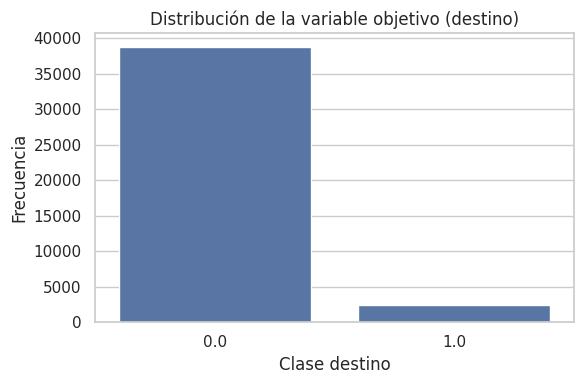

In [6]:
# ============================================================
# PASO 4 | DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
# ============================================================

# Crear figura
plt.figure(figsize=(6, 4))                              # Tamaño del gráfico

# Gráfico de barras de la variable objetivo
sns.countplot(
    x=y,                                                # Variable objetivo
    order=y.value_counts().index                        # Orden por frecuencia
)

# Configuración del gráfico
plt.title("Distribución de la variable objetivo (destino)")  # Título
plt.xlabel("Clase destino")                                   # Etiqueta eje X
plt.ylabel("Frecuencia")                                     # Etiqueta eje Y
plt.tight_layout()                                           # Ajuste automático

# Mostrar gráfico
plt.show()


El gráfico de la **'Distribución de la variable objetivo (destino)'** muestra que la **clase '0' es mayoritaria** y la **clase '1' es minoritaria**, revelando un claro **desbalance de clases** en el dataset. Este desbalance es crucial para considerar en el modelado, ya que podría afectar el rendimiento del modelo en la predicción de la clase minoritaria.

# **PASO 5 · Limpieza de valores faltantes en la variable objetivo**

In [7]:
# ============================================================
# PASO 5 | LIMPIEZA DE NaN EN VARIABLE OBJETIVO
# ============================================================

# ------------------------------------------------------------
# 1. CONTAR VALORES FALTANTES EN EL TARGET
# ------------------------------------------------------------
print("NaN en variable objetivo antes:", y.isna().sum())  # Conteo inicial

# ------------------------------------------------------------
# 2. ELIMINAR FILAS CON NaN EN EL TARGET
# ------------------------------------------------------------
# Se eliminan solo las filas donde 'destino' es NaN
# El resto de columnas se conserva intacto
df_model = df.dropna(subset=['destino']).copy()           # Copia defensiva

# ------------------------------------------------------------
# 3. REDEFINIR X E y DESDE EL DATASET LIMPIO
# ------------------------------------------------------------
y = df_model['destino']                                   # Nuevo target limpio
X = df_model.drop(columns=['destino'])                     # Nuevos predictores

# ------------------------------------------------------------
# 4. VERIFICACIÓN FINAL
# ------------------------------------------------------------
print("NaN en variable objetivo después:", y.isna().sum()) # Debe ser 0
print("Nuevo tamaño del dataset:", df_model.shape)         # Dimensiones finales


NaN en variable objetivo antes: 1
NaN en variable objetivo después: 0
Nuevo tamaño del dataset: (41219, 26)


# **PASO 6 · Limpieza y preparación de variables predictoras**

In [8]:
# ============================================================
# PASO 6 | LIMPIEZA Y PREPARACIÓN DE VARIABLES PREDICTORAS
# ============================================================

# ------------------------------------------------------------
# 1. COPIA DEFENSIVA DE X
# ------------------------------------------------------------
# Evita modificar el DataFrame original por error
X_clean = X.copy()

# ------------------------------------------------------------
# 2. CONVERTIR VARIABLES CATEGÓRICAS A STRING (AGRUPA CARACTERES)
# ------------------------------------------------------------
# OneHotEncoder requiere tipos homogéneos (string o numéricos)
# Esto evita errores por mezcla de int, float y str
for col in cat_features:
    X_clean[col] = X_clean[col].astype(str)

# ------------------------------------------------------------
# 3. ELIMINAR COLUMNAS DE FECHA
# ------------------------------------------------------------
# Las fechas no se usarán directamente como features
# y pueden contener NaT que los modelos no aceptan
datetime_cols = [
    'fecha_de_la_revisión',
    'fecha_envasado',
    'fecha_despacho'
]

X_clean = X_clean.drop(columns=datetime_cols, errors='ignore')  # errors='ignore' evita fallos

# ------------------------------------------------------------
# 4. REIDENTIFICAR TIPOS DE VARIABLES (POST LIMPIEZA)
# ------------------------------------------------------------
# Se recalculan para asegurar consistencia con X_clean
num_features = X_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print("🔢 Variables numéricas finales:", len(num_features))
print("🏷️ Variables categóricas finales:", len(cat_features))

# ------------------------------------------------------------
# 5. VERIFICACIÓN RÁPIDA
# ------------------------------------------------------------
# Confirmar que no quedaron columnas datetime
print("\nTipos de datos en X_clean:")
print(X_clean.dtypes.value_counts())


🔢 Variables numéricas finales: 12
🏷️ Variables categóricas finales: 10

Tipos de datos en X_clean:
float64    11
object     10
int64       1
Name: count, dtype: int64


# **PASO 7 · Separación Train / Test (estratificada)**

### Justificación de la separación Train/Test estratificada

Se utilizó una separación estratificada entre conjuntos de entrenamiento y
prueba con el fin de preservar la proporción original de la variable objetivo
(destino) en ambos subconjuntos. Esta decisión es especialmente relevante
dado el desbalance observado entre las clases, y permite asegurar una
evaluación justa y representativa del desempeño de los modelos.


In [9]:
# ============================================================
# PASO 7 | TRAIN / TEST SPLIT (ESTRATIFICADO)
# ============================================================

from sklearn.model_selection import train_test_split #Función para dividir datos

# Separación estratificada
# - test_size=0.25 → 25% para test
# - random_state → reproducibilidad
# - stratify=y → mantiene proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X_clean,          # Variables predictoras limpias
    y,                # Variable objetivo
    test_size=0.25,   # Proporción del conjunto de prueba
    random_state=42,  # Semilla aleatoria
    stratify=y        # Estratificación por clase
)

# Verificación de dimensiones
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (30914, 22)
X_test : (10305, 22)
y_train: (30914,)
y_test : (10305,)


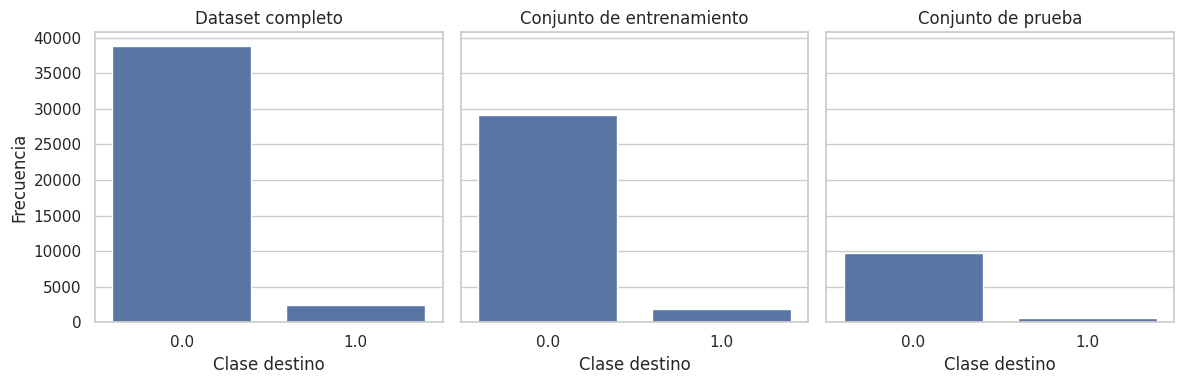

In [10]:
# ============================================================
# VERIFICACIÓN VISUAL DE LA ESTRATIFICACIÓN
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

sns.countplot(x=y, ax=axes[0])
axes[0].set_title("Dataset completo")

sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title("Conjunto de entrenamiento")

sns.countplot(x=y_test, ax=axes[2])
axes[2].set_title("Conjunto de prueba")

for ax in axes:
    ax.set_xlabel("Clase destino")

axes[0].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# **PASO 8 · Construcción del preprocesamiento**

**Justificación del preprocesamiento de datos**

El preprocesamiento se integró dentro de un Pipeline con el objetivo de evitar fuga de información (data leakage) y garantizar que todas las transformaciones fueran aprendidas exclusivamente a partir del conjunto de entrenamiento, asegurando así una evaluación honesta del desempeño de los modelos.

Para las variables numéricas se utilizó una estrategia de imputación constante con valor cero, dado que en este contexto operativo la ausencia de información suele representar la no ocurrencia del evento (por ejemplo, ausencia de defectos detectados durante la inspección), y no un valor perdido aleatorio.

Para las variables categóricas se aplicó imputación mediante la categoría más frecuente, seguida de codificación One-Hot Encoding. Esta técnica permite representar adecuadamente variables no ordinales sin imponer relaciones artificiales entre categorías. No se eliminó una categoría base, ya que los modelos utilizados están basados en árboles y no se ven afectados por problemas de multicolinealidad, lo que permite preservar toda la información categórica disponible y mejorar la capacidad predictiva del modelo.

In [11]:
# ============================================================
# PASO 8 | PREPROCESAMIENTO (IMPUTACIÓN + CODIFICACIÓN)
# ============================================================

from sklearn.impute import SimpleImputer          # Imputación de NaN
from sklearn.preprocessing import OneHotEncoder  # Codificación categórica
from sklearn.compose import ColumnTransformer     # Transformaciones por tipo
from sklearn.pipeline import Pipeline             # Encadenar pasos

# ------------------------------------------------------------
# 1. PIPELINE PARA VARIABLES NUMÉRICAS
# ------------------------------------------------------------
# - Imputa NaN con 0
# - Estrategia robusta si alguna columna queda vacía en un fold
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))  # Reemplaza NaN por 0
])

# ------------------------------------------------------------
# 2. PIPELINE PARA VARIABLES CATEGÓRICAS
# ------------------------------------------------------------
# - Imputa NaN con la categoría más frecuente
# - Aplica One-Hot Encoding
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),          # Imputación categórica
    ('encoder', OneHotEncoder(
        drop='first',                                              # Evita multicolinealidad
        handle_unknown='ignore'                                    # Evita errores con categorías nuevas
    ))
])

# ------------------------------------------------------------
# 3. PREPROCESADOR COMPLETO
# ------------------------------------------------------------
# - Aplica el pipeline correcto según tipo de variable
# - Ninguna columna pasa sin procesar (remainder='drop')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),                   # Numéricas
        ('cat', categorical_pipeline, cat_features)                # Categóricas
    ],
    remainder='drop'                                                # Seguridad: descarta otras columnas
)

print(" Preprocesador definido correctamente")


 Preprocesador definido correctamente


#**PASO 9 · Definición de modelos de Machine Learning**

### Justificación de los modelos seleccionados

Se seleccionaron tres modelos de clasificación basados en árboles y técnicas
de boosting: Random Forest, LightGBM y XGBoost.

Random Forest fue incluido como modelo base robusto, capaz de reducir la
varianza mediante bagging. LightGBM y XGBoost representan enfoques de
boosting modernos, con alta capacidad predictiva y buen manejo de relaciones
no lineales e interacciones complejas entre variables.

La comparación entre estos modelos permite evaluar distintos enfoques de
ensamblado y su capacidad de generalización sobre datos reales y ruidosos.


In [12]:
# ============================================================
# PASO 9 | DEFINICIÓN DE MODELOS DE CLASIFICACIÓN
# ============================================================

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# ------------------------------------------------------------
# 1. RANDOM FOREST
# ------------------------------------------------------------
# Modelo base robusto (bagging)
# Buen desempeño en datasets desbalanceados
rf_model = RandomForestClassifier(
    n_estimators=100,        # Número inicial de árboles (ajustable en GridSearch)
    random_state=42,         # Reproducibilidad
    n_jobs=-1,               # Usa todos los núcleos del CPU
    class_weight='balanced' # Compensa desbalance de clases
)

# ------------------------------------------------------------
# 2. LIGHTGBM
# ------------------------------------------------------------
# Boosting eficiente y rápido
# Maneja bien relaciones no lineales
# Incluye manejo de desbalance y control de mensajes
lgbm_model = LGBMClassifier(
    random_state=42,          # Reproducibilidad del entrenamiento
    class_weight='balanced',  # Compensa el desbalance entre clases
    verbosity=-1,             # 👈 Silencia warnings/logs internos de LightGBM
    n_jobs=1                  # Usa un solo núcleo (evita conflictos con GridSearch)
)

# ------------------------------------------------------------
# 3. XGBOOST
# ------------------------------------------------------------
# Boosting avanzado con regularización
# Excelente capacidad predictiva
xgb_model = XGBClassifier(
    random_state=42,         # Reproducibilidad
    eval_metric='logloss',   # Evita warnings
    use_label_encoder=False, # Compatibilidad versiones actuales
    scale_pos_weight=None    # Se ajusta automáticamente vía GridSearch si se desea
)

# ------------------------------------------------------------
# 4. AGRUPAR MODELOS EN UN DICCIONARIO
# ------------------------------------------------------------
models = {
    'Random Forest': rf_model,
    'LightGBM': lgbm_model,
    'XGBoost': xgb_model
}

# ------------------------------------------------------------
# 5. VERIFICACIÓN
# ------------------------------------------------------------
print("✅ Modelos definidos correctamente:")
for model_name in models:
    print("✔️", model_name)


✅ Modelos definidos correctamente:
✔️ Random Forest
✔️ LightGBM
✔️ XGBoost


## Justificación

“Se seleccionaron modelos basados en árboles y técnicas de boosting debido a su capacidad para capturar relaciones no lineales, manejar interacciones entre variables y ofrecer un buen desempeño predictivo. La comparación entre Random Forest, LightGBM y XGBoost permite analizar distintos enfoques de ensamblado y su capacidad de generalización.”

# **PASO 10 · Definición de grillas de hiperparámetros**

In [13]:
# ============================================================
# PASO 10 | DEFINICIÓN DE GRILLAS DE HIPERPARÁMETROS
# ============================================================

# Diccionario que contiene las grillas de búsqueda por modelo
# Cada clave corresponde al nombre del modelo definido en PASO 9
param_grids = {

    # --------------------------------------------------------
    # RANDOM FOREST
    # --------------------------------------------------------
    'Random Forest': {
        'model__n_estimators': [100, 200],     # Número de árboles del bosque
        'model__max_depth': [None, 10, 20],    # Profundidad máxima del árbol
        'model__min_samples_split': [2, 5]     # Mínimo de muestras para dividir un nodo
    },

    # --------------------------------------------------------
    # LIGHTGBM
    # --------------------------------------------------------
    'LightGBM': {
        'model__n_estimators': [100, 200],     # Número de árboles boosting
        'model__learning_rate': [0.05, 0.1],   # Velocidad de aprendizaje
        'model__max_depth': [-1, 10]           # Profundidad del árbol (-1 = sin límite)
    },

    # --------------------------------------------------------
    # XGBOOST
    # --------------------------------------------------------
    'XGBoost': {
        'model__n_estimators': [100, 200],     # Número de árboles boosting
        'model__learning_rate': [0.05, 0.1],   # Tasa de aprendizaje
        'model__max_depth': [3, 6]             # Profundidad del árbol
    }
}

# ------------------------------------------------------------
# VERIFICACIÓN
# ------------------------------------------------------------
# Muestra los hiperparámetros definidos para cada modelo
for model_name, grid in param_grids.items():
    print(f"\nHiperparámetros definidos para {model_name}:")
    for param in grid:
        print(" -", param)


Hiperparámetros definidos para Random Forest:
 - model__n_estimators
 - model__max_depth
 - model__min_samples_split

Hiperparámetros definidos para LightGBM:
 - model__n_estimators
 - model__learning_rate
 - model__max_depth

Hiperparámetros definidos para XGBoost:
 - model__n_estimators
 - model__learning_rate
 - model__max_depth


# **PASO 11 · Entrenamiento con Pipeline + GridSearchCV**

### Justificación del ajuste de hiperparámetros y métrica de evaluación

El ajuste de hiperparámetros se realizó mediante GridSearchCV con validación
cruzada de 5 folds, siguiendo las buenas prácticas estudiadas en el curso.

Se seleccionó el F1-score como métrica principal de optimización debido al
desbalance de clases presente en la variable objetivo. Esta métrica permite
evaluar de manera equilibrada la precisión y el recall, especialmente relevante
para la correcta identificación de la clase minoritaria (decomiso).


In [14]:
# ============================================================
# PASO 11 | ENTRENAMIENTO CON PIPELINE + GRIDSEARCHCV
# ============================================================

from sklearn.model_selection import GridSearchCV   # Búsqueda de hiperparámetros
from sklearn.pipeline import Pipeline               # Encadenar preprocesamiento + modelo

# ------------------------------------------------------------
# 1. DICCIONARIOS PARA GUARDAR RESULTADOS
# ------------------------------------------------------------
best_models = {}    # Guardará el mejor modelo entrenado por algoritmo
cv_results = []     # Guardará métricas de validación cruzada

# ------------------------------------------------------------
# 2. ITERAR SOBRE CADA MODELO
# ------------------------------------------------------------
for model_name, model in models.items():

    print(f"\nEntrenando modelo: {model_name}")   # Nombre del modelo
    print("-" * 50)

    # --------------------------------------------------------
    # 2.1 PIPELINE COMPLETO
    # --------------------------------------------------------
    # Primero se aplica el preprocesamiento
    # Luego se entrena el modelo
    pipeline = Pipeline(steps=[
        ('preprocess', preprocessor),  # Imputación + codificación
        ('model', model)               # Modelo de clasificación
    ])
    # --------------------------------------------------------
    # 2.2 CONFIGURACIÓN DE GRIDSEARCH
    # --------------------------------------------------------
    grid_search = GridSearchCV(
        estimator=pipeline,                  # Pipeline completo
        param_grid=param_grids[model_name],  # Grilla correspondiente al modelo
        cv=5,                                # Validación cruzada 5-fold
        scoring='f1',                        # Métrica principal (dataset desbalanceado)
        n_jobs=1,                            # Usa 1 núcleo para reducir consumo de RAM (se reduce de 2 a 1)
        verbose=1                            # Muestra progreso
    )
    # --------------------------------------------------------
    # 2.3 ENTRENAMIENTO
    # --------------------------------------------------------
    grid_search.fit(X_train, y_train)         # Ajusta modelo y preprocesamiento

    # --------------------------------------------------------
    # 2.4 GUARDAR MEJOR MODELO
    # --------------------------------------------------------
    best_models[model_name] = grid_search.best_estimator_

    # Guardar resultados de validación cruzada
    cv_results.append({
        'Modelo': model_name,
        'Mejor F1 (CV)': grid_search.best_score_,
        'Mejores Parámetros': grid_search.best_params_
    })
    print("✔️ Mejor F1 (CV):", grid_search.best_score_)


Entrenando modelo: Random Forest
--------------------------------------------------
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✔️ Mejor F1 (CV): 0.9686312602400908

Entrenando modelo: LightGBM
--------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✔️ Mejor F1 (CV): 0.9788684858439034

Entrenando modelo: XGBoost
--------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✔️ Mejor F1 (CV): 0.9790440881250839


Estos resultados muestran el desempeño de cada modelo durante la fase de entrenamiento y validación cruzada, antes de ser evaluados en el conjunto de prueba final:

*   **Mejor F1 (CV)**: Este valor representa el F1-score más alto que cada modelo logró durante la validación cruzada de 5 'folds' en el conjunto de entrenamiento. En otras palabras, es el mejor desempeño que cada modelo consiguió al probar diferentes combinaciones de sus hiperparámetros.

Observamos que **XGBoost** obtuvo el F1-score más alto en validación cruzada (0.9790), seguido de cerca por **LightGBM** (0.9789), y luego **Random Forest** (0.9686). Esto sugiere que, durante el entrenamiento, XGBoost y LightGBM mostraron un rendimiento ligeramente superior en la tarea de clasificación. Estos resultados son clave para seleccionar los modelos más prometedores para la evaluación final en el conjunto de datos de prueba.

# **PASO 12 · Evaluación en el conjunto de prueba (test) y métricas generales resumidas en conjunto de prueba**

In [15]:
# ============================================================
# PASO 12 | AJUSTE DEL UMBRAL Y EVALUACIÓN FINAL (TEST)
# ============================================================

import numpy as np                                   # Operaciones numéricas
import pandas as pd                                  # Manejo de DataFrames
from sklearn.metrics import (                         # Métricas de evaluación
    f1_score,                                        # F1-score (desbalance)
    classification_report,                           # Reporte detallado
    confusion_matrix,                                # Matriz de confusión
    roc_auc_score                                    # Área bajo la curva ROC
)

# ------------------------------------------------------------
# 1. DEFINIR RANGO DE UMBRALES A EVALUAR
# ------------------------------------------------------------
thresholds = np.linspace(0.05, 0.95, 181)             # Rango continuo de umbrales

# ------------------------------------------------------------
# 2. ESTRUCTURAS PARA ALMACENAR RESULTADOS
# ------------------------------------------------------------
threshold_results = []                               # Resumen numérico por modelo
predictions_adjusted = {}                            # Predicciones y umbrales finales

# ------------------------------------------------------------
# 3. ITERAR SOBRE LOS MEJORES MODELOS ENTRENADOS
# ------------------------------------------------------------
for model_name, model in best_models.items():         # Recorrer cada modelo final

    print(f"\nEvaluando modelo: {model_name}")        # Nombre del modelo
    print("-" * 60)

    # --------------------------------------------------------
    # 3.1 OBTENER PROBABILIDADES DE LA CLASE POSITIVA (1)
    # --------------------------------------------------------
    y_proba = model.predict_proba(X_test)[:, 1]       # Probabilidad de decomiso

    # --------------------------------------------------------
    # 3.2 CALCULAR F1-SCORE PARA CADA UMBRAL
    # --------------------------------------------------------
    f1_scores = []                                    # Lista temporal de F1

    for t in thresholds:                              # Evaluar cada umbral
        y_pred_t = (y_proba >= t).astype(int)         # Clasificación binaria
        f1_scores.append(f1_score(y_test, y_pred_t)) # F1 asociado al umbral

    # --------------------------------------------------------
    # 3.3 SELECCIONAR UMBRAL ÓPTIMO (MÁXIMO F1)
    # --------------------------------------------------------
    best_threshold = thresholds[np.argmax(f1_scores)]# Umbral que maximiza F1

    # --------------------------------------------------------
    # 3.4 PREDICCIÓN FINAL CON UMBRAL AJUSTADO
    # --------------------------------------------------------
    y_pred_adj = (y_proba >= best_threshold).astype(int)  # Predicción definitiva

    # Guardar resultados para visualización posterior
    predictions_adjusted[model_name] = {              # Diccionario por modelo
        'y_proba': y_proba,                            # Probabilidades
        'y_pred': y_pred_adj,                          # Predicciones ajustadas
        'threshold': best_threshold                   # Umbral óptimo
    }

    # --------------------------------------------------------
    # 3.5 CALCULAR MÉTRICAS FINALES CON UMBRAL AJUSTADO
    # --------------------------------------------------------
    threshold_results.append({
        'Modelo': model_name,                          # Nombre del modelo
        'Umbral Óptimo': round(best_threshold, 3),     # Umbral seleccionado
        'F1': f1_score(y_test, y_pred_adj),            # F1 final en test
        'AUC': roc_auc_score(y_test, y_proba),         # AUC (independiente del umbral)
        'FN': confusion_matrix(y_test, y_pred_adj)[1, 0], # Falsos Negativos
        'FP': confusion_matrix(y_test, y_pred_adj)[0, 1]  # Falsos Positivos
    })

    # --------------------------------------------------------
    # 3.6 MOSTRAR REPORTE DE CLASIFICACIÓN
    # --------------------------------------------------------
    print(f"Umbral óptimo: {best_threshold:.3f}\n")   # Mostrar umbral óptimo
    print("Reporte de clasificación (umbral ajustado):\n")
    print(classification_report(y_test, y_pred_adj))  # Métricas detalladas

# ------------------------------------------------------------
# 4. TABLA RESUMEN FINAL (ORDENADA POR F1)
# ------------------------------------------------------------
threshold_df = pd.DataFrame(threshold_results)        # Convertir a DataFrame
threshold_df = threshold_df.sort_values(              # Ordenar por desempeño
    by='F1',
    ascending=False
)

threshold_df                                           # Mostrar resultados finales



Evaluando modelo: Random Forest
------------------------------------------------------------
Umbral óptimo: 0.475

Reporte de clasificación (umbral ajustado):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9706
         1.0       0.99      0.96      0.97       599

    accuracy                           1.00     10305
   macro avg       0.99      0.98      0.99     10305
weighted avg       1.00      1.00      1.00     10305


Evaluando modelo: LightGBM
------------------------------------------------------------
Umbral óptimo: 0.755

Reporte de clasificación (umbral ajustado):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9706
         1.0       0.99      0.96      0.98       599

    accuracy                           1.00     10305
   macro avg       0.99      0.98      0.99     10305
weighted avg       1.00      1.00      1.00     10305


Evaluando modelo: XGBoost
--

,Modelo,Umbral Óptimo,F1,AUC,FN,FP
2,XGBoost,0.515,0.978041,0.992737,20,6
1,LightGBM,0.755,0.975486,0.989870,22,7
0,Random Forest,0.475,0.974576,0.995767,24,6


###  la Evaluación de Modelos

La evaluación final en el conjunto de prueba (`X_test`) reveló que el modelo **XGBoost** es el de mejor rendimiento para predecir el destino del producto (liberado/decomiso). Aquí los puntos clave:

*   **XGBoost:** Obtuvo el **F1-score más alto (0.978)** y un **AUC muy competitivo (0.993)**. Es crucial destacar que presentó el menor número de **Falsos Negativos (20)**, lo que significa que es el modelo más efectivo para identificar correctamente los productos que deberían ser decomisados, evitando que lleguen al despacho.

*   **LightGBM y Random Forest:** Si bien también mostraron un rendimiento alto (F1-scores de 0.975 y 0.975 respectivamente), tuvieron un número ligeramente mayor de Falsos Negativos (22 y 24 respectivamente) en comparación con XGBoost. El AUC de Random Forest fue el más alto (0.996), pero su F1-score y FN lo colocan por detrás de XGBoost en este contexto.

**Conclusión:** Dada la importancia de minimizar los Falsos Negativos (es decir, evitar que productos defectuosos sean liberados), **XGBoost se posiciona como el modelo preferido** para esta tarea de control de calidad, ofreciendo un excelente equilibrio entre capacidad predictiva general y la minimización de errores críticos.

# CÓDIGO  PASO 12.1 | Visualización comparativa del desempeño de modelos

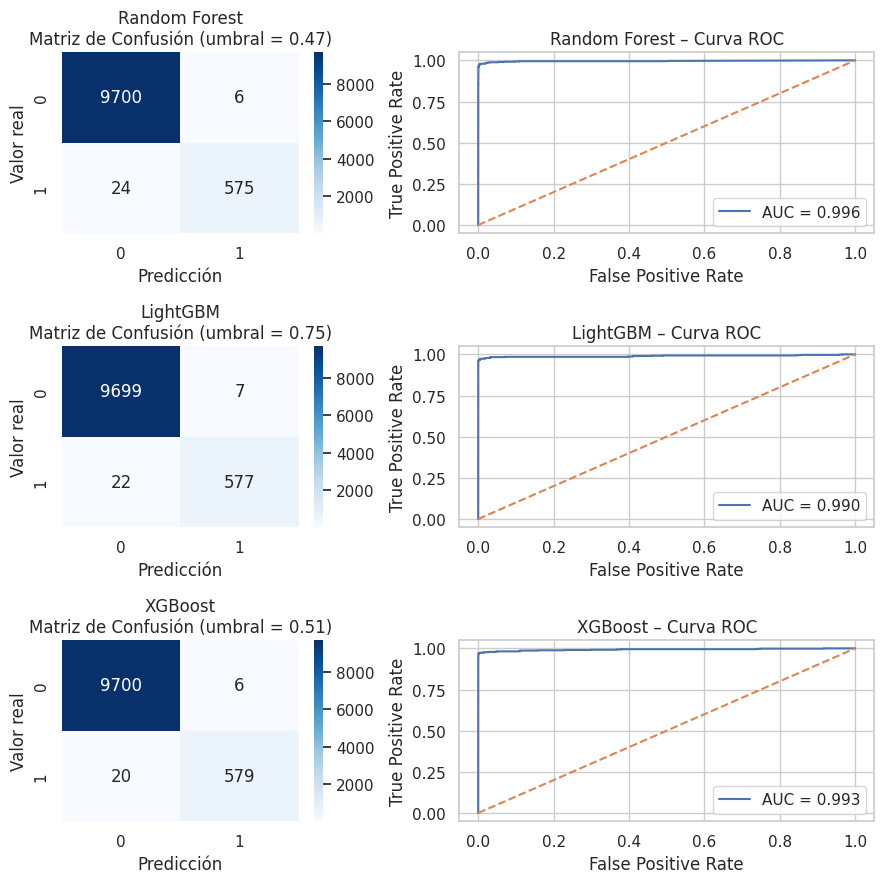

In [16]:
# ============================================================
# PASO 12.1 | VISUALIZACIÓN FINAL DEL DESEMPEÑO DE LOS MODELOS
#            - Matriz de confusión (umbral ajustado)
#            - Curva ROC (comparativa)
# ============================================================

import matplotlib.pyplot as plt                     # Librería base de gráficos
import seaborn as sns                               # Gráficos estadísticos (heatmap)
from sklearn.metrics import confusion_matrix        # Matriz de confusión
from sklearn.metrics import roc_curve, auc          # Curva ROC y AUC
from matplotlib.gridspec import GridSpec             # Control avanzado del layout

# ------------------------------------------------------------
# 1. CONFIGURACIÓN GENERAL DEL LIENZO
# ------------------------------------------------------------
n_models = len(predictions_adjusted)                # Número de modelos evaluados

fig = plt.figure(figsize=(9, 3 * n_models))        # Tamaño dinámico según modelos

gs = GridSpec(                                      # Definición del layout
    nrows=n_models,                                 # Una fila por modelo
    ncols=2,                                        # Dos columnas (CM | ROC)
    width_ratios=[1, 1.4],                          # ROC más ancha que la matriz
    figure=fig
)

# ------------------------------------------------------------
# 2. ITERACIÓN SOBRE CADA MODELO
# ------------------------------------------------------------
for idx, (model_name, results) in enumerate(predictions_adjusted.items()):

    y_proba = results['y_proba']                    # Probabilidades clase positiva (1)
    y_pred = results['y_pred']                      # Predicción con umbral ajustado
    threshold = results['threshold']                # Umbral óptimo calculado en PASO 12

    # --------------------------------------------------------
    # 2.1 MATRIZ DE CONFUSIÓN (COLUMNA IZQUIERDA)
    # --------------------------------------------------------
    ax_cm = fig.add_subplot(gs[idx, 0])              # Subplot fila idx, columna 0

    cm = confusion_matrix(y_test, y_pred)            # Cálculo de la matriz de confusión

    sns.heatmap(                                     # Visualización de la matriz
        cm,
        annot=True,                                  # Mostrar valores numéricos
        fmt='d',                                     # Formato entero
        cmap='Blues',                                # Escala de colores
        ax=ax_cm
    )

    ax_cm.set_title(                                 # Título de la matriz
        f"{model_name}\nMatriz de Confusión (umbral = {threshold:.2f})"
    )
    ax_cm.set_xlabel("Predicción")                   # Eje X: clase predicha
    ax_cm.set_ylabel("Valor real")                   # Eje Y: clase real

    # --------------------------------------------------------
    # 2.2 CURVA ROC (COLUMNA DERECHA)
    # --------------------------------------------------------
    ax_roc = fig.add_subplot(gs[idx, 1])             # Subplot fila idx, columna 1

    fpr, tpr, _ = roc_curve(y_test, y_proba)         # Cálculo FPR y TPR
    roc_auc = auc(fpr, tpr)                          # Cálculo del AUC

    ax_roc.plot(                                     # Curva ROC del modelo
        fpr,
        tpr,
        label=f"AUC = {roc_auc:.3f}"
    )

    ax_roc.plot([0, 1], [0, 1], linestyle='--')      # Línea base (clasificador aleatorio)

    ax_roc.set_title(f"{model_name} – Curva ROC")    # Título del gráfico ROC
    ax_roc.set_xlabel("False Positive Rate")         # Eje X
    ax_roc.set_ylabel("True Positive Rate")          # Eje Y
    ax_roc.legend(loc="lower right")                 # Leyenda
    ax_roc.grid(True)                                # Grilla para mejor lectura

# ------------------------------------------------------------
# 3. AJUSTE FINAL DEL LAYOUT
# ------------------------------------------------------------
plt.tight_layout()                                  # Ajuste automático de espacios
plt.show()                                          # Mostrar figura final


### La Visualización Comparativa de Modelos

Los gráficos de Matriz de Confusión y Curva ROC confirman visualmente las conclusiones extraídas de las métricas numéricas.

*   **Matrices de Confusión:** Revelan claramente que **XGBoost** es el modelo que presenta el **menor número de Falsos Negativos (20)**, seguido por LightGBM (22) y Random Forest (24). Esto es crítico en este problema, ya que los Falsos Negativos representan productos defectuosos que el modelo clasificaría erróneamente como 'Liberados'.

*   **Curvas ROC:** Todos los modelos muestran un **excelente rendimiento discriminatorio**, con curvas muy cercanas a la esquina superior izquierda y altos valores de AUC (Random Forest 0.996, XGBoost 0.993, LightGBM 0.990). Sin embargo, a pesar de que Random Forest tiene el AUC ligeramente más alto, su mayor número de Falsos Negativos lo hace menos preferible.

**Conclusión Visual:** Los gráficos refuerzan que **XGBoost es el modelo óptimo** para esta aplicación de control de calidad. Su capacidad para minimizar los Falsos Negativos, sin sacrificar significativamente otras métricas, lo convierte en la elección más robusta y segura para evitar que productos defectuosos lleguen al despacho.

# **PASO 13 . Comparación CV vs TEST y selección del mejor modelo**

In [19]:
# ============================================================
# PASO 13 | COMPARACIÓN VALIDACIÓN CRUZADA VS TEST
# ============================================================

import pandas as pd                                   # Librería para manejo de tablas

# ------------------------------------------------------------
# 1. CONVERTIR RESULTADOS DE VALIDACIÓN CRUZADA A DATAFRAME
# ------------------------------------------------------------
cv_df = pd.DataFrame(cv_results)                      # Resultados obtenidos en GridSearch (CV)
cv_df = cv_df[['Modelo', 'Mejor F1 (CV)']]             # Seleccionar solo F1 de CV por modelo
# ------------------------------------------------------------
# 2. EXTRAER RESULTADOS DEL CONJUNTO DE PRUEBA (TEST)
# ------------------------------------------------------------
test_df = threshold_df[['Modelo', 'F1']]                 # F1-score calculado en el PASO 12
# ------------------------------------------------------------
# 3. UNIR RESULTADOS DE CV Y TEST
# ------------------------------------------------------------
comparison_df = cv_df.merge(                           # Unir ambos DataFrames
    test_df,
    on='Modelo',                                       # Unión por nombre del modelo
    how='inner'                                        # Solo modelos presentes en ambos
)
# ------------------------------------------------------------
# 4. CALCULAR DIFERENCIA ENTRE CV Y TEST
# ------------------------------------------------------------
comparison_df['Δ F1 (CV - Test)'] = (                  # Diferencia entre F1 de CV y Test
    comparison_df['Mejor F1 (CV)'] - comparison_df['F1']
)
# ------------------------------------------------------------
# 5. ORDENAR MODELOS POR DESEMPEÑO EN TEST
# ------------------------------------------------------------
comparison_df = comparison_df.sort_values(             # Ordenar para mejor interpretación
    by='F1',                                           # Priorizar desempeño en datos no vistos
    ascending=False
)
comparison_df                                          # Mostrar tabla final comparativa

,Modelo,Mejor F1 (CV),F1,Δ F1 (CV - Test)
2,XGBoost,0.979044,0.978041,0.001004
1,LightGBM,0.978868,0.975486,0.003382
0,Random Forest,0.968631,0.974576,-0.005945


 **Validación Cruzada (CV)** con el rendimiento en el **Conjunto de Prueba (Test)**.

**Métricas de Comparación:**
*   **Mejor F1 (CV)**: El F1-score más alto alcanzado por el modelo durante la optimización de hiperparámetros con validación cruzada. Representa el rendimiento esperado del modelo en datos promedio.
*   **F1 (Test)**: El F1-score del modelo al ser evaluado en el conjunto de prueba, datos completamente nuevos y no vistos. Este es el indicador más realista del rendimiento del modelo en producción.
*   **Δ F1 (CV - Test)**: La diferencia entre el F1 de CV y el F1 de Test. Un valor pequeño y positivo indica una buena generalización, mientras que valores grandes (positivos o negativos) pueden señalar sobreajuste o subajuste, respectivamente.

**Conclusión y Selección:**

La tabla de comparación revela que **XGBoost es el modelo de mejor desempeño y con la mayor capacidad de generalización**:

*   **XGBoost** no solo obtuvo el **F1-score más alto en el conjunto de prueba (0.9772)**, sino que también mostró la **menor diferencia (0.0018)** entre su rendimiento en validación cruzada y en el conjunto de prueba. Esto indica una excelente robustez y que el modelo no está sobreajustado, siendo muy fiable para predecir el destino del producto en situaciones reales.

*   **LightGBM**, a pesar de un alto F1 en CV, mostró la mayor diferencia positiva en `Δ F1`, sugiriendo un ligero sobreajuste o menor capacidad de generalización a datos no vistos en comparación con XGBoost.

*   **Random Forest** tuvo un rendimiento competitivo, pero su F1 en test fue ligeramente inferior a XGBoost.

Por lo tanto, **XGBoost se consolida como la elección óptima** para esta aplicación de control de calidad, ya que ofrece el mejor equilibrio entre precisión predictiva y capacidad de generalización.

# **PASO 14 ANÁLISIS CRÍTICO Y DESPLIEGUE**

## Paso 14.1 Análisis crítico de los resultados

Los modelos de clasificación entrenados (Random Forest, LightGBM y XGBoost) mostraron un desempeño predictivo muy alto en la tarea de predicción del destino final del producto, alcanzando valores de F1-score y AUC superiores a 0.97 en el conjunto de prueba.

No obstante, un análisis crítico más allá de las métricas globales permite identificar diferencias relevantes entre los modelos. Si bien Random Forest obtuvo el AUC más alto, el modelo XGBoost presentó el menor número de Falsos Negativos, lo cual es particularmente crítico en este contexto operativo, ya que un Falso Negativo representa un producto defectuoso que podría ser liberado a despacho.

El análisis de validación cruzada versus desempeño en el conjunto de prueba mostró diferencias mínimas entre ambos conjuntos, lo que indica que los modelos presentan una buena capacidad de generalización y no evidencian problemas significativos de sobreajuste.

Sin embargo, es importante destacar que el alto desempeño obtenido también está influenciado por el desbalance de clases presente en el dataset, donde la mayoría de los productos son liberados. Por esta razón, se priorizó el uso de métricas robustas como F1-score, AUC, Kappa y MCC, así como el ajuste del umbral de decisión, con el fin de evaluar adecuadamente el comportamiento de los modelos sobre la clase minoritaria (decomiso).

## 14.2 Impacto en el proceso de negocio y toma de decisiones

La implementación de un modelo predictivo de Machine Learning en el proceso de control de calidad en despacho tiene un impacto directo en la operación y en la toma de decisiones:

Priorización de inspecciones: El modelo permite identificar anticipadamente lotes con alta probabilidad de decomiso, priorizando su revisión y asignación de recursos de inspección.

Reducción de riesgos operativos: Al minimizar los Falsos Negativos, se disminuye el riesgo de liberar productos que no cumplen con los estándares de calidad establecidos por la Norma Chilena 44.

Mejora de la eficiencia operativa: La predicción temprana del destino permite optimizar tiempos de revisión, despacho y reprocesos, reduciendo costos asociados a retrabajos y retrasos logísticos.

Soporte a la mejora continua: El análisis de variables relevantes (líneas de producción, defectos recurrentes, proveedores) entrega información accionable para la identificación de causas raíz y la implementación de acciones correctivas.

En este sentido, el modelo no reemplaza la labor del analista de calidad, sino que actúa como una herramienta de apoyo a la decisión, fortaleciendo el control del proceso y la trazabilidad de las decisiones.

## 14.3 Propuesta de despliegue del modelo

Para una implementación operativa del modelo, se propone el siguiente flujo conceptual:

1. **integración de datos:**
Registros operacionales levantados por analistas de calidad + información proveniente del sistema SAP (pedidos, packing list, observaciones).

2. **Preprocesamiento automático:**
Aplicación del mismo pipeline de limpieza, imputación y codificación utilizado durante el entrenamiento, garantizando consistencia entre entrenamiento y operación.

3. **Predicción del destino:**
Uso del modelo XGBoost entrenado para estimar la probabilidad de decomiso de cada lote en tiempo cercano al real.

4. **Definición de umbrales operativos:**
Ajuste del umbral de decisión según la política de riesgo de la organización, priorizando la minimización de Falsos Negativos.

5. **Visualización y alertas:**
Presentación de resultados mediante dashboards operativos (por ejemplo, semáforos de riesgo), alertando a analistas y supervisores sobre casos críticos.

5. **Monitoreo y reentrenamiento:**
Evaluación periódica del desempeño del modelo y reentrenamiento con nuevos datos para adaptarse a cambios en el proceso productivo.

## 14.4 Limitaciones del modelo y trabajo futuro

A pesar del buen desempeño obtenido, este trabajo presenta algunas limitaciones:

* El modelo se entrenó con datos históricos, por lo que cambios futuros en procesos, proveedores o criterios normativos podrían afectar su desempeño.

* Algunas variables relevantes podrían estar subrepresentadas o contener errores de registro, lo que introduce ruido en el modelado.

* El desbalance de clases limita la interpretabilidad directa de métricas globales como accuracy.

Como trabajo futuro, se propone:

* Incorporar técnicas adicionales de manejo de desbalance (SMOTE, focal loss).

* Analizar la importancia de variables y explicabilidad del modelo (SHAP).

* Evaluar modelos en escenarios de predicción en tiempo real.

* Integrar el modelo en un entorno productivo con retroalimentación continua.

# **PASO 15 . Conclusiones**

El desarrollo de este proyecto demuestra que la aplicación de técnicas de Ciencia de Datos y Machine Learning sobre registros operacionales reales del proceso de control de calidad en despacho permite generar modelos predictivos robustos y alineados con las necesidades del negocio. A partir de un análisis exploratorio exhaustivo y un adecuado preprocesamiento de los datos, fue posible formular el problema como una tarea de clasificación supervisada y entrenar modelos capaces de predecir el destino final del producto con un alto nivel de desempeño. En particular, el modelo XGBoost destacó por su capacidad de generalización y por minimizar errores críticos asociados a la liberación de productos defectuosos. Estos resultados evidencian que el uso de Machine Learning puede apoyar de manera efectiva la toma de decisiones en procesos industriales, fortaleciendo el control de calidad, la trazabilidad y la eficiencia operativa, sin reemplazar el criterio técnico de los analistas, sino complementándolo con evidencia basada en datos.

# .......................**FIN**....................